Loader EMG Data
===============

In [1]:
%load_ext autoreload
%autoreload 2


from neuromotor_data_loading.plot import plot_emg, plot_wrist
from neuromotor_data_loading.load import load_data
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [2]:
root_data_folder = "/Users/rickwarren/Documents/emg_data/"


def get_task_files(root_data_folder: str, task: str):
    """Get all hdf5 files for a given task (discrete_gestures, handwriting, or wrist_pose)."""
    task_folder = os.path.join(root_data_folder, task)
    return glob.glob(os.path.join(task_folder, '*.hdf5'))

# Discrete Gestures

In [3]:
gesture_files = get_task_files(root_data_folder, "discrete_gestures")
gesture_file = gesture_files[0]
gesture_data = load_data(gesture_file)

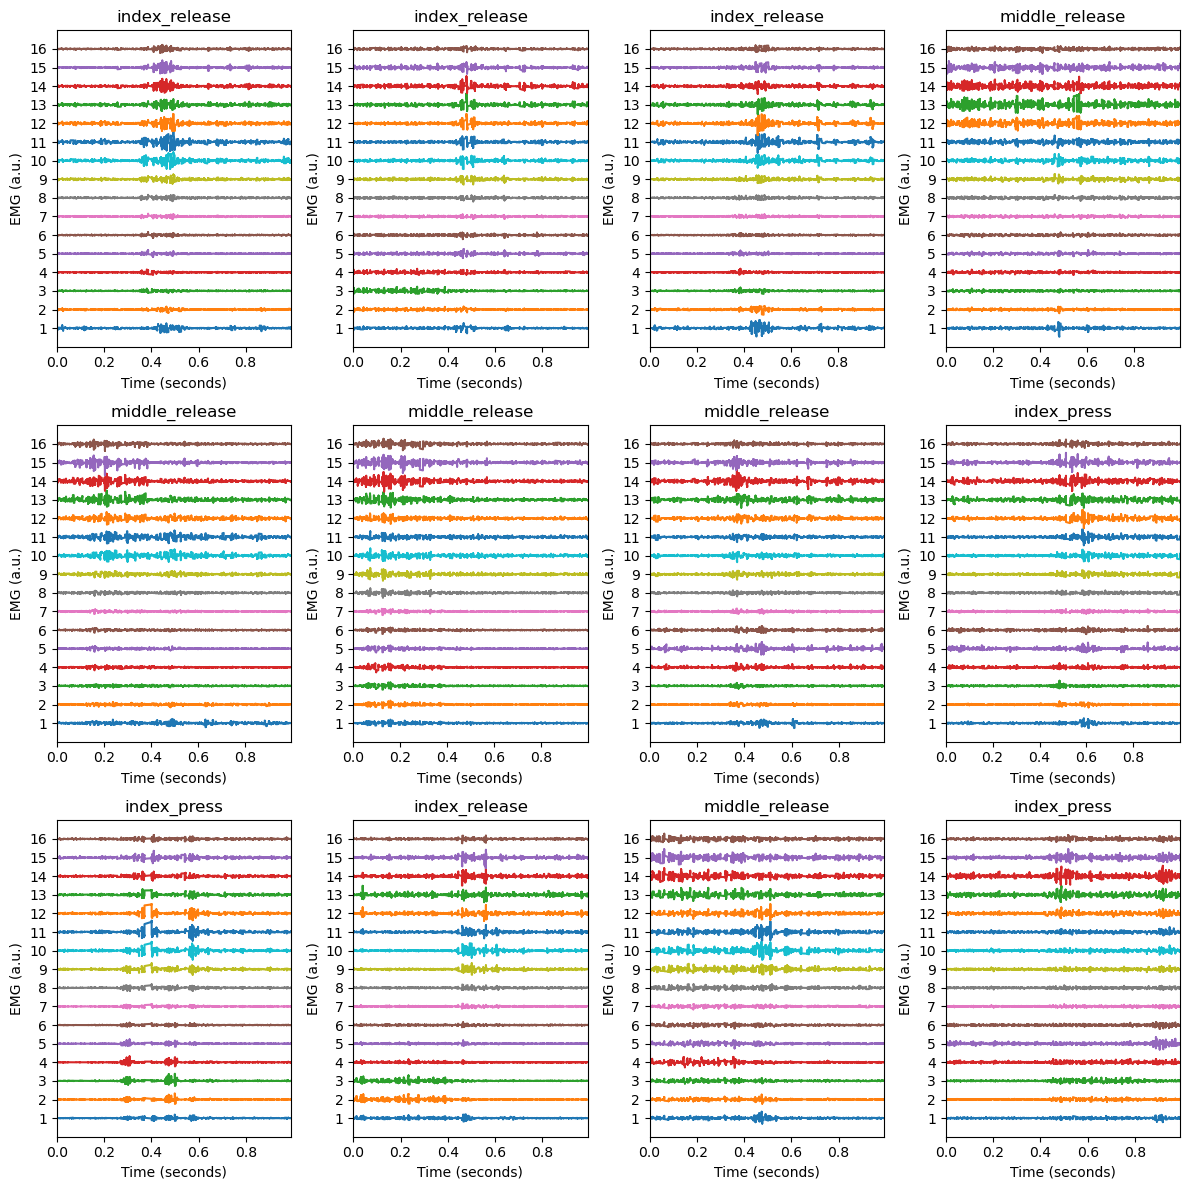

In [4]:
window = [-.5, .5]
nrows = 3
ncols = 4

fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 3, nrows * 4))

# Sample random gestures
gestures = gesture_data.labels.sample(nrows * ncols, random_state=0, replace=False)


for ax, (_, gesture) in zip(axs.flatten(), gestures.iterrows()):
    timeseries = gesture_data.partition(gesture.time + window[0], gesture.time + window[1])
    plot_emg(timeseries["time"], timeseries["emg"], ax=ax)
    gesture_name = gesture.loc["name"]
    ax.set(title=f"{gesture_name}")

plt.tight_layout()

# Handwriting

In [5]:
handwriting_files = get_task_files(root_data_folder, "handwriting")
handwriting_file = handwriting_files[0]
handwriting_data = load_data(handwriting_file)

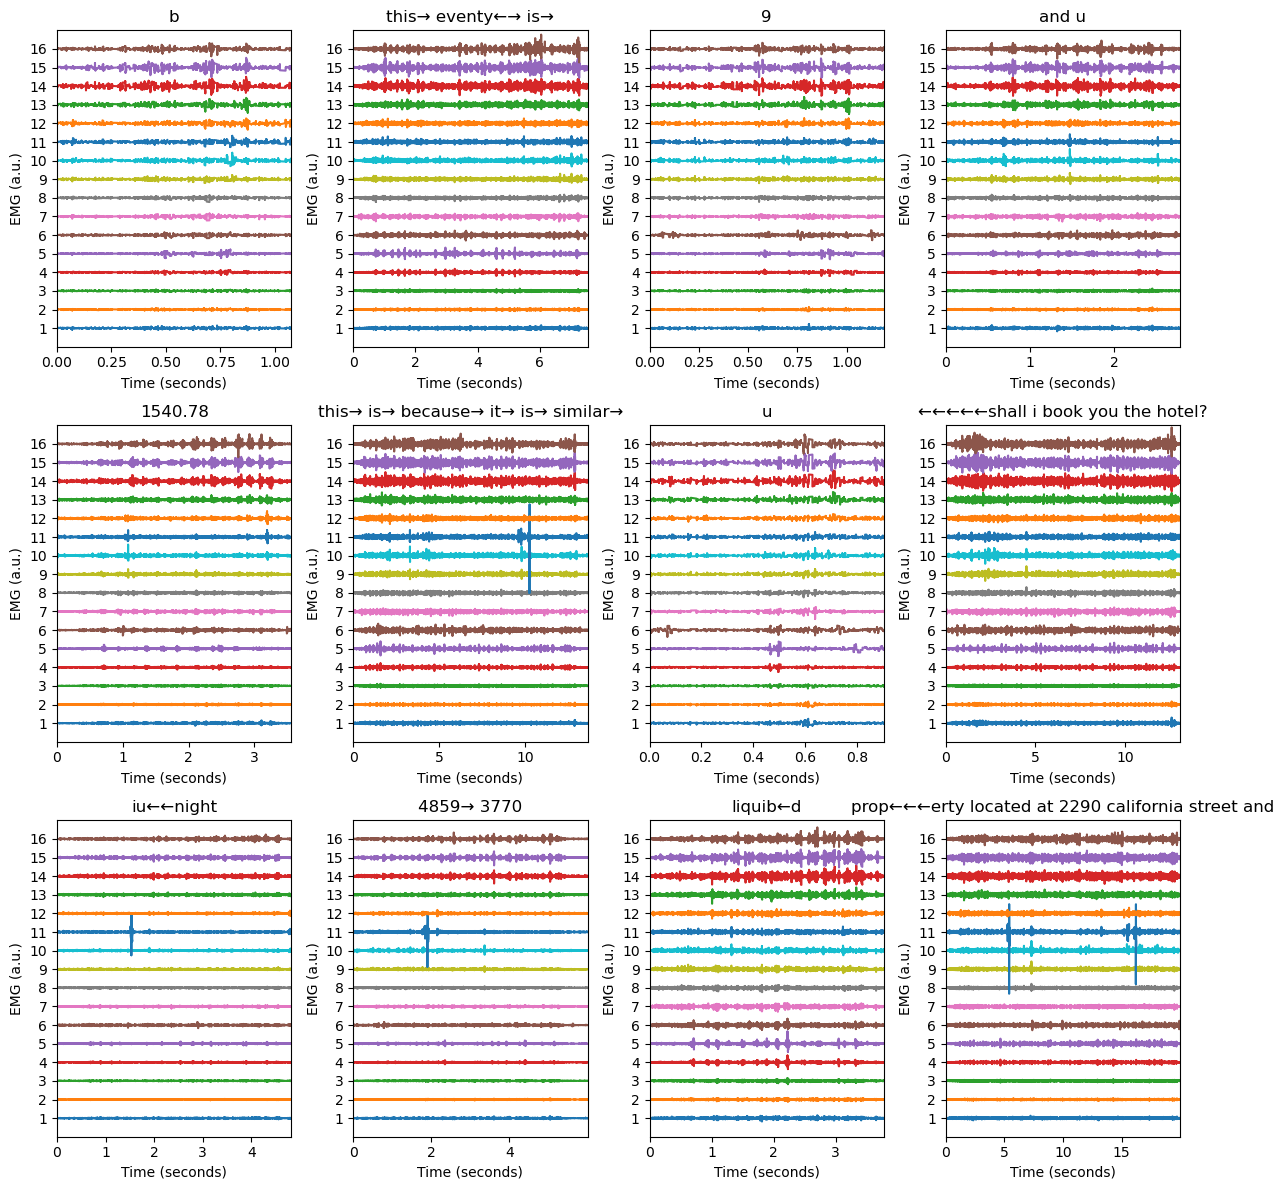

In [6]:
nrows = 3
ncols = 4

fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 3, nrows * 4))

# Sample random prompts
prompts = handwriting_data.labels.sample(nrows * ncols, random_state=0, replace=False)


for ax, (_, prompt) in zip(axs.flatten(), prompts.iterrows()):
    timeseries = handwriting_data.partition(prompt.start, prompt.end)
    plot_emg(timeseries["time"], timeseries["emg"], ax=ax)
    ax.set(title=f"{prompt.prompt}")

plt.tight_layout()

# Wrist pose

In [7]:
wrist_files = get_task_files(root_data_folder, "wrist_pose")

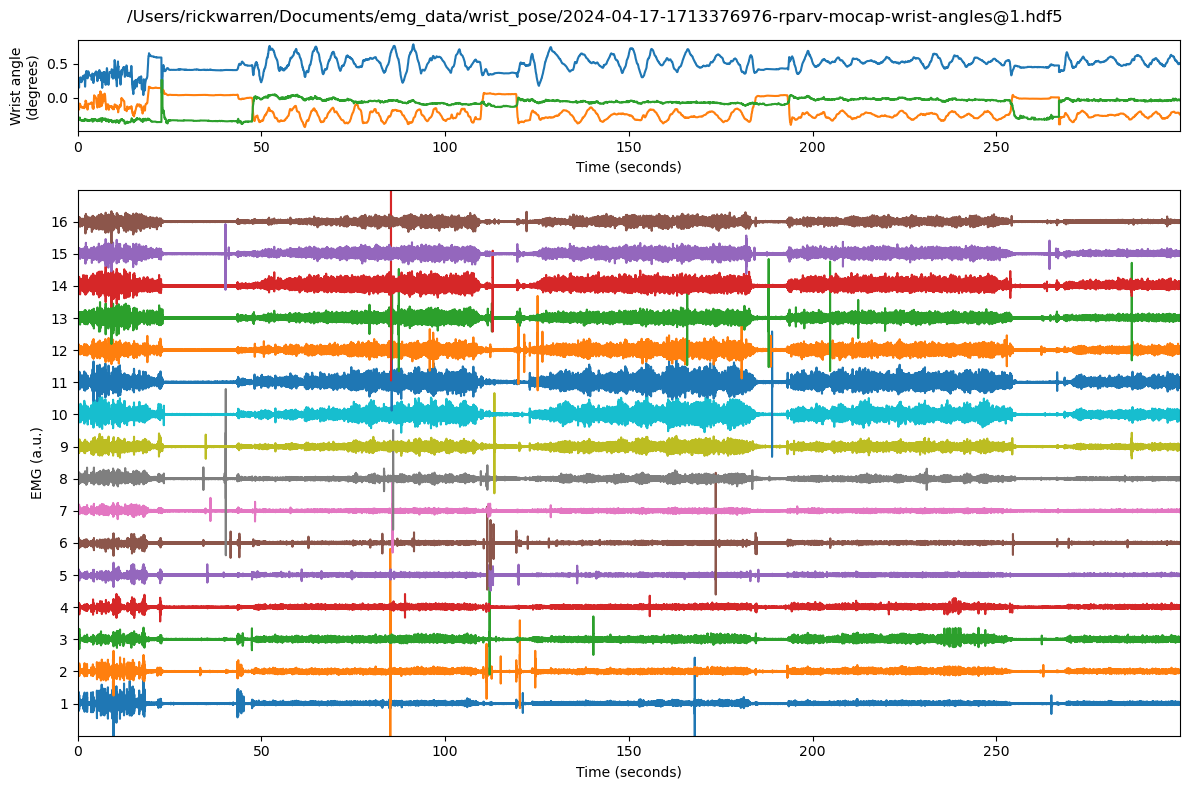

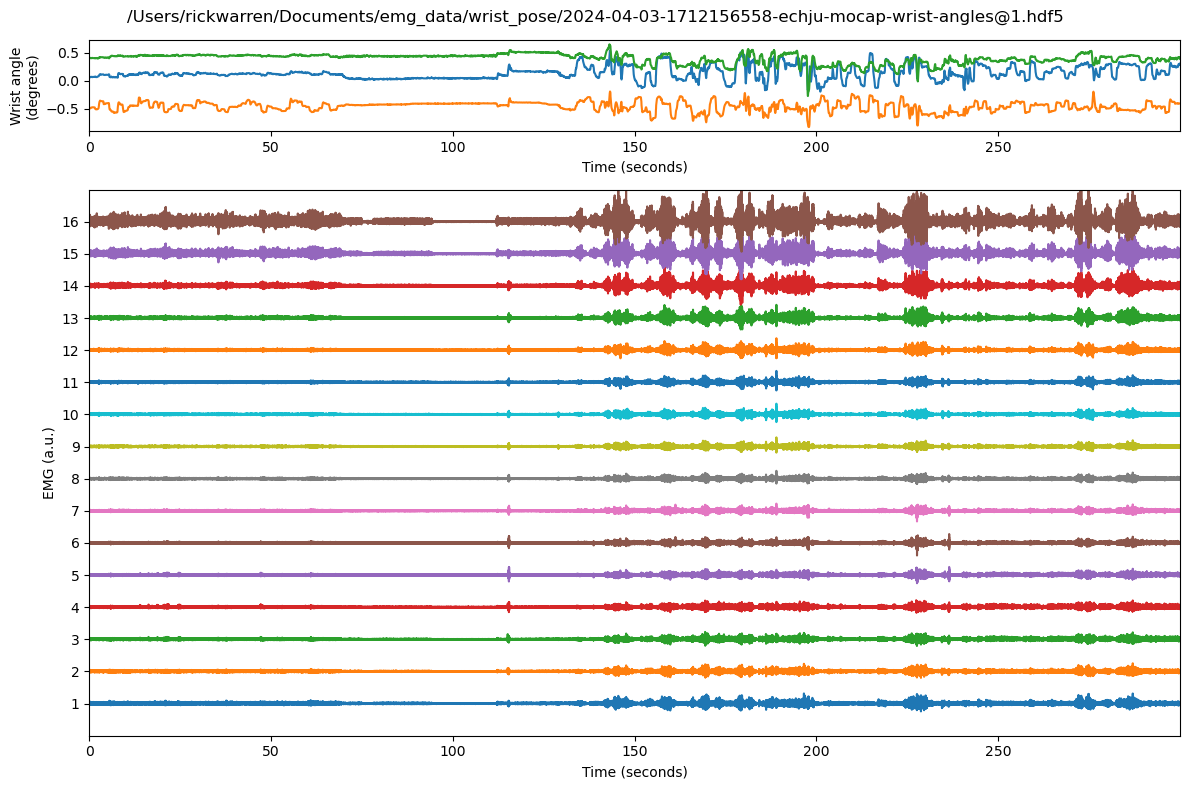

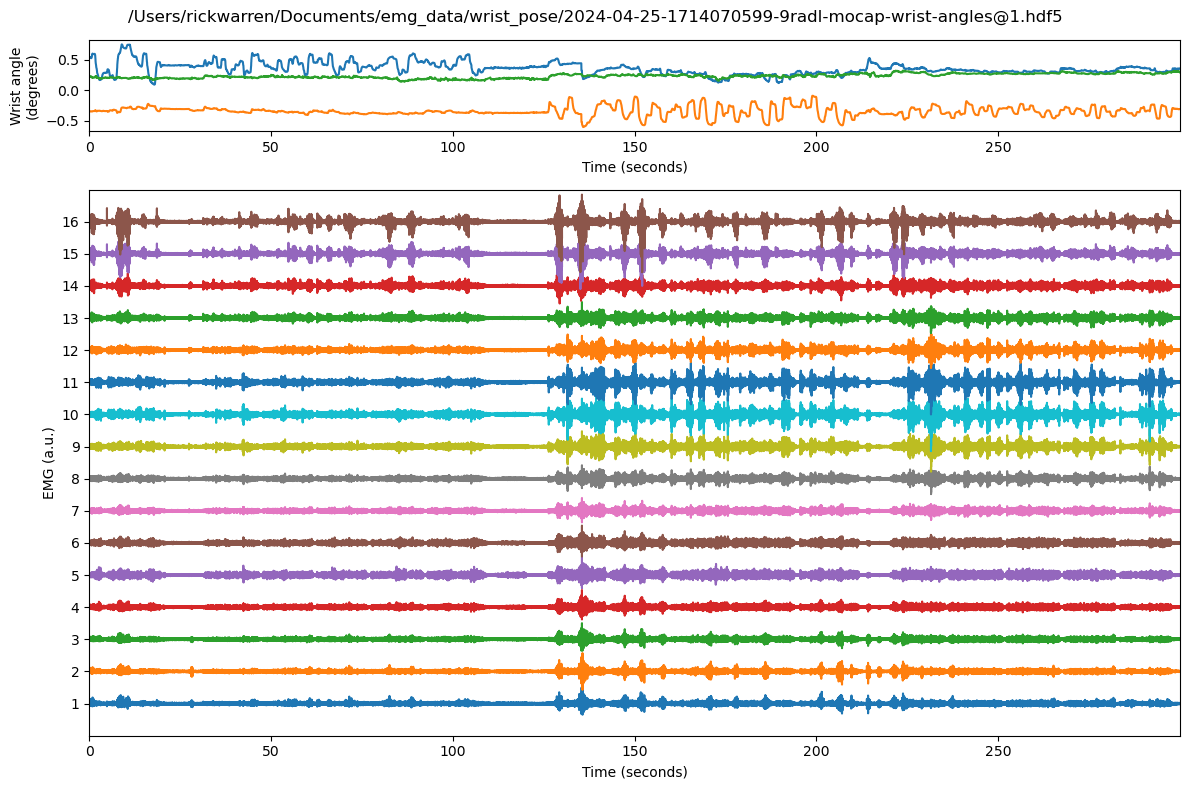

In [8]:
num_examples = 3
duration = 60 * 5


rng = np.random.default_rng(0)

for wrist_file in wrist_files[:num_examples]:
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={"height_ratios": [1, 6]})
    
    # Load wrist data
    wrist_data = load_data(wrist_file)
    

    # Select a random starting point
    start_t = rng.choice(wrist_data.time[wrist_data.time < (wrist_data.time[-1] - duration)])
    timeseries = wrist_data.partition(start_t, start_t + duration)
    
    plot_wrist(timeseries["time"], timeseries["wrist_angles"], ax=axs[0])
    plot_emg(timeseries["time"], timeseries["emg"], ax=axs[1])

    fig.suptitle(wrist_file)
    plt.tight_layout()